# Классификаиция клиентов телеком компании

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

## Откройте и изучите файл

### Подключение необходимых библиотек.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

### Открытие и изучение данных.

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')

In [3]:
df.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [5]:
df['is_ultra'].value_counts()

0    2229
1     985
Name: is_ultra, dtype: int64

### Вывод по шагу 1.
Перед нами стоит задача классификации. За целевой признак берем столбец is_ultra. 


## Разбейте данные на выборки

In [6]:
train_df, other_df = train_test_split(df, test_size=0.40, random_state=12345, stratify=df['is_ultra'])
valid_df, test_df = train_test_split(other_df, test_size=0.50, random_state=12345)

print('Размер обучающей выборки:', train_df.shape[0])
print('Размер валидационной выборки:', valid_df.shape[0])
print('Размер тестовой выборки:', test_df.shape[0])

Размер обучающей выборки: 1928
Размер валидационной выборки: 643
Размер тестовой выборки: 643


### Вывод по шагу 2.
Данные были разбиты по принципу 60/20/20.

- Обучение пройдет на данных train_df.
- Валидация модели на данных valid_df.
- Лучшая модель по валидации будет применена на данных test_df.

## Исследуйте модели

### Определение признаков и целевого признака.

In [7]:
train_df_features = train_df.drop(['is_ultra'], axis=1)
train_df_target = train_df['is_ultra']
valid_df_features = valid_df.drop(['is_ultra'], axis=1)
valid_df_target = valid_df['is_ultra']
test_df_features = test_df.drop(['is_ultra'], axis=1)
test_df_target = test_df['is_ultra']

### Дерево решений. Настройка гиперпараметров.

In [8]:
best_depth = 0
best_accuracy = 0

for depth in range(1,101):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    if accuracy > best_accuracy:
        best_depth = depth
        best_accuracy = accuracy

print('Лучшая глубина дерева:', best_depth)
print('Лучшая точность:', best_accuracy)        

Лучшая глубина дерева: 5
Лучшая точность: 0.8055987558320373


In [9]:
model = DecisionTreeClassifier(random_state=12345, max_depth=5, criterion='entropy')
model.fit(train_df_features, train_df_target)
valid_predictions = model.predict(valid_df_features)
accuracy = accuracy_score(valid_df_target, valid_predictions)
print('Точность:',accuracy)

Точность: 0.8040435458786936


In [10]:
best_ss = 0
best_accuracy = 0

for ss in range(2,101):
    model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_split=ss)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    if accuracy > best_accuracy:
        best_ss = ss
        best_accuracy = accuracy

print('Лучшee значение параметра min_samples_split:', best_ss)
print('Лучшая точность:', best_accuracy) 

Лучшee значение параметра min_samples_split: 46
Лучшая точность: 0.8102643856920684


In [27]:
best_ll = 0
best_accuracy = 0

for ll in range(1,101):
    model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_split=46, min_samples_leaf=ll)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    if accuracy > best_accuracy:
        best_ll = ll
        best_accuracy = accuracy

print('Лучшее значение параметра min_samples_leaf:', best_ll)
print('Лучшая точность:', best_accuracy) 

Лучшее значение параметра min_samples_leaf: 16
Лучшая точность: 0.8180404354587869


Сохраним лучшую настройку для модели.

In [12]:
best_tree_model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_split=46, min_samples_leaf=16)
best_tree_model.fit(train_df_features, train_df_target)
best_tree_model_valid_predictions = best_tree_model.predict(valid_df_features)
tree_model_accuracy = accuracy_score(valid_df_target, best_tree_model_valid_predictions)
print('Точность:',accuracy)

Точность: 0.7698289269051322


### Случайный лес.

In [13]:
best_estim = 0
best_accuracy = 0

for estim in range(1,101):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшее количество деревьев:', best_estim)
print('Лучшая точность:', best_accuracy)     

Лучшее количество деревьев: 98
Лучшая точность: 0.8180404354587869


In [14]:
model = RandomForestClassifier(random_state=12345, n_estimators=98, criterion='entropy')
model.fit(train_df_features, train_df_target)
valid_predictions = model.predict(valid_df_features)
accuracy = accuracy_score(valid_df_target, valid_predictions)
print('Точность:',accuracy)

Точность: 0.8055987558320373


Оставим другие гиперпараметры по умолчанию.

In [15]:
best_forest_model = RandomForestClassifier(random_state=12345, n_estimators=98)
best_forest_model.fit(train_df_features, train_df_target)
best_forest_valid_predictions = best_forest_model.predict(valid_df_features)
best_forest_accuracy = accuracy_score(valid_df_target, best_forest_valid_predictions)
print('Точность:',best_forest_accuracy)

Точность: 0.8180404354587869


### Логистическая регрессия.

In [16]:
best_solver = ''
best_accuracy = 0

for solve in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
    model = LogisticRegression(random_state=12345, solver=solve)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    
    if accuracy > best_accuracy:
        best_solver= solve
        best_accuracy = accuracy

print('Лучший алгоритм:', best_solver)
print('Лучшая точность', best_accuracy) 

Лучший алгоритм: newton-cg
Лучшая точность 0.7371695178849145


In [17]:
best_max_iter = 0
best_accuracy = 0

for max_iter in range(1,201):
    model = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=max_iter)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    
    if accuracy > best_accuracy:
        best_max_iter = max_iter
        best_accuracy = accuracy

print('Лучшее количество итераций:', best_max_iter)
print('Лучшая точность:', best_accuracy)  

Лучшее количество итераций: 34
Лучшая точность: 0.7371695178849145


In [18]:
best_reg_model = LogisticRegression(random_state=12345, solver='newton-cg', max_iter=34)
best_reg_model.fit(train_df_features, train_df_target)
best_reg_valid_predictions = best_reg_model.predict(valid_df_features)
best_reg_accuracy = accuracy_score(valid_df_target, best_reg_valid_predictions)
print('Точность:',best_reg_accuracy)

Точность: 0.7371695178849145


### Вывод по шагу 3.
В ходе исследования были получены следующие данные:

- Точность модели дерева решений при глубине 3 равна 0.785. <b>(upd. 5 и 0.810)</b> 
- Точность модели случайного леса при количестве деревьев 23 равна 0.795. <b>(upd. 0.818)</b> 
- Точность модели логистической регресии равна 0.757. <b>(upd.0.737)<b>

Лучший результат показывает модель случайного леса с гиперпараметром n_estimators=23.

Лучшее количество деревьев: 98
Лучшая точность: 0.8180404354587869


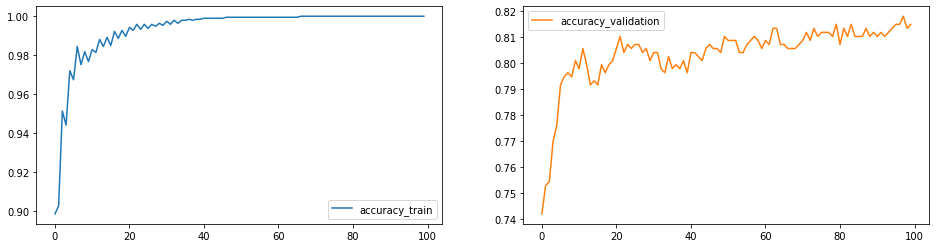

In [53]:
#Комментарий ревьювера
best_estim = 0
best_accuracy = 0
scores_val = []
scores_train = []
for estim in range(1,101):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    scores_train.append(accuracy_score(train_df_target, model.predict(train_df_features)))
    scores_val.append(accuracy)
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшее количество деревьев:', best_estim)
print('Лучшая точность:', best_accuracy)
dct = {}
dct['accuracy_train'] = scores_train
dct['accuracy_validation'] = scores_val
pd.DataFrame(dct).plot(subplots=True, layout=(1, 2), figsize=(16,4));

In [19]:
best_estim = 0
best_accuracy = 0

for estim in range(1,101):
    model = RandomForestClassifier(random_state=12345, n_estimators=estim)
    model.fit(train_df_features, train_df_target)
    valid_predictions = model.predict(valid_df_features)
    accuracy = accuracy_score(valid_df_target, valid_predictions)
    print('estim', estim,'Точность',accuracy)
    if accuracy > best_accuracy:
        best_estim = estim
        best_accuracy = accuracy

print('Лучшее количество деревьев:', best_estim)
print('Лучшая точность:', best_accuracy)  

estim 1 Точность 0.7418351477449455
estim 2 Точность 0.7527216174183515
estim 3 Точность 0.7542768273716952
estim 4 Точность 0.7698289269051322
estim 5 Точность 0.776049766718507
estim 6 Точность 0.7916018662519441
estim 7 Точность 0.7947122861586314
estim 8 Точность 0.7962674961119751
estim 9 Точность 0.7947122861586314
estim 10 Точность 0.8009331259720062
estim 11 Точность 0.7978227060653188
estim 12 Точность 0.8055987558320373
estim 13 Точность 0.7993779160186625
estim 14 Точность 0.7916018662519441
estim 15 Точность 0.7931570762052877
estim 16 Точность 0.7916018662519441
estim 17 Точность 0.7993779160186625
estim 18 Точность 0.7962674961119751
estim 19 Точность 0.7993779160186625
estim 20 Точность 0.8009331259720062
estim 21 Точность 0.8055987558320373
estim 22 Точность 0.8102643856920684
estim 23 Точность 0.8040435458786936
estim 24 Точность 0.807153965785381
estim 25 Точность 0.8055987558320373
estim 26 Точность 0.807153965785381
estim 27 Точность 0.807153965785381
estim 28 Точно

## Проверьте модель на тестовой выборке

In [20]:
test_predictions = best_tree_model.predict(test_df_features)
accuracy = accuracy_score(test_df_target, test_predictions)
print('Точность модели дерева решений на тестовой выборке:',accuracy)

test_predictions = best_forest_model.predict(test_df_features)
accuracy = accuracy_score(test_df_target, test_predictions)
print('Точность модели случайного леса на тестовой выборке:',accuracy)

test_predictions = best_reg_model.predict(test_df_features)
accuracy = accuracy_score(test_df_target, test_predictions)
print('Точность модели логистической регресиии на тестовой выборке:',accuracy)

Точность модели дерева решений на тестовой выборке: 0.7962674961119751
Точность модели случайного леса на тестовой выборке: 0.8009331259720062
Точность модели логистической регресиии на тестовой выборке: 0.7418351477449455


### Вывод по шагу 4.
Для решения поставленной задачи можно выбрать модель случайного леса. 

## (бонус) Проверьте модели на адекватность

In [21]:
test_predictions = best_forest_model.predict(test_df_features)
accuracy = accuracy_score(test_df_target, test_predictions)
precision = precision_score(test_df_target, test_predictions)
recall = recall_score(test_df_target, test_predictions)
f_score = f1_score(test_df_target, test_predictions)

print(' Accuracy =', accuracy, '\n', 'Precision =', precision,'\n', 'Recall =', recall, '\n','F-мера =', f_score)


 Accuracy = 0.8009331259720062 
 Precision = 0.7328767123287672 
 Recall = 0.5459183673469388 
 F-мера = 0.6257309941520468


Мы получили не самые высокие значения по всем метрикам качества, но модель адекватна и может быть использована.

In [22]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(train_df_features, train_df_target)
dummy_clf.predict(test_df_features)
accuracy = accuracy_score(test_df_target, test_predictions)
print(accuracy)

0.8009331259720062


In [58]:
#Комментарий ревьювера
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(df.drop(['is_ultra'], axis=1), df['is_ultra'])
print(accuracy_score(df['is_ultra'], dummy_clf.predict(df.drop(['is_ultra'], axis=1))))

0.693528313627878


# Общий вывод
В ходе проделанной работы были исследованы три модели классификации: дерево решений, случайный лес и логистическая регрессия.
Найдены оптимальные параметры для каждой модели и выбрана одна из них для решения задачи.

Модель случайного леса показала лучшие результаты с точностью 0.78 (upd.0.80).

Для обучения модели было использована выборка в 2000 значений. Увеличение размера обучающей выборки поможет повысить качество.
